In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn as sk

### In sklearn, a machine learning  algorithm or model is called estimator
* Classification problem:a category/label is predicted(heart disease or not),
* Regression problem:a continuous varible/number is predicted(selling price of houses)

In [2]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing()

In [126]:
california_housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
df=pd.DataFrame(california_housing['data'], columns=california_housing['feature_names'])
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [4]:
df['price']=pd.DataFrame(california_housing['target'])
df['price']

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: price, Length: 20640, dtype: float64

The target contains the median of the house value(in 100$) for each district. Therefore, this problem is a regression problem.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


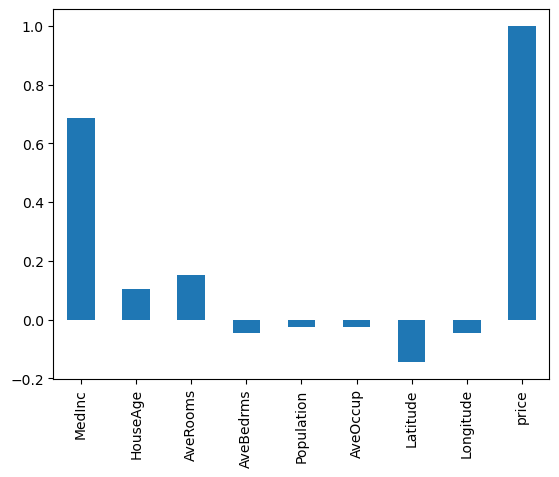

In [9]:
df.corr()['price'].plot(kind='bar');

In [10]:
X= df.drop(columns='price')
y=df['price']

from sklearn.model_selection import train_test_split
np.random.seed(12)
xtr, xt, ytr, yt= train_test_split(X,y, test_size=0.1)
yt

6906     2.114
767      1.952
10555    2.418
17456    1.283
20617    0.708
         ...  
10410    1.519
5333     3.938
14132    1.381
19132    3.103
11448    3.691
Name: price, Length: 2064, dtype: float64

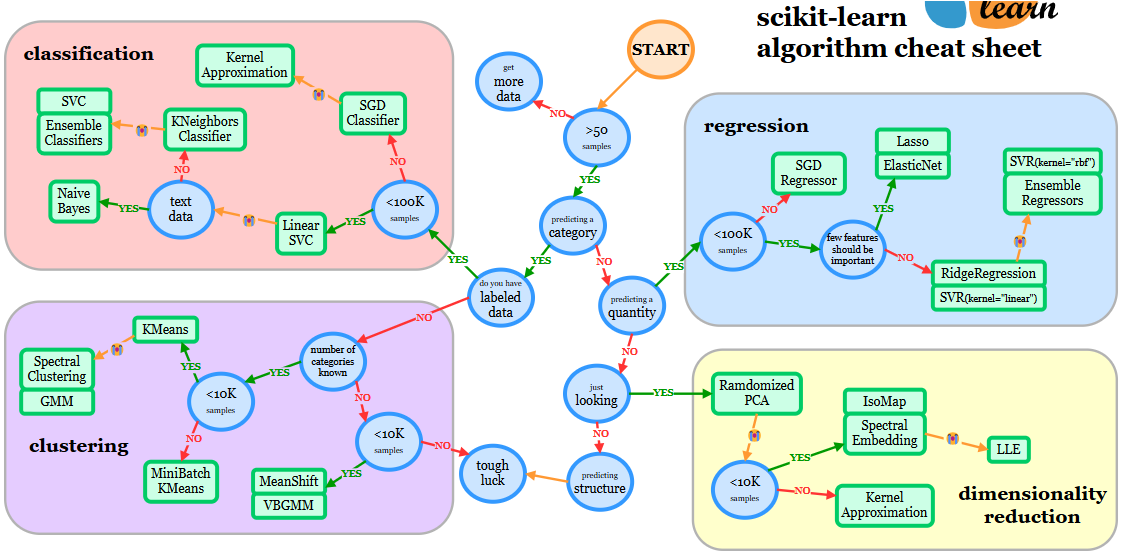

In [11]:
from IPython.display import Image 
Image(filename=r"C:\Users\Lucky Prem\OneDrive\Desktop\Screenshot 2025-01-28 201158.png", width=900, height=700)

In [12]:
from sklearn.linear_model import Ridge

reg=Ridge()
reg.fit(xtr,ytr)
reg.score(xt,yt)

0.6323672472518802

In [144]:
from sklearn.linear_model import Lasso
reg=Lasso() 
reg.fit(xtr,ytr)
reg.score(xt,yt) 

0.2978942775162343

Lasso uses L1 regularization, adding the absolute value of the coefficients.The key difference is that Lasso can drive some coefficients to zero, effectively performing feature selection, while Ridge tends to shrink coefficients but doesn't zero them out, and coz L1 regularization is sensitive to feature scales, so standardizing (making mean 0 and variance 1) is necessary.
* if the dataset has highly correlated features, Lasso might select one arbitrarily. But maybe using Elastic Net, which combines L1 and L2 penalties, could be better in that case. ElasticNet is supposed to handle correlations better than Lasso

In [13]:
from sklearn.linear_model import ElasticNet

reg=ElasticNet()
reg.fit(xtr,ytr)
reg.score(xt,yt) 

0.4455817703604231

Well, we can always use a different model

whats about Ensemble model(Ensemble is the combination of many smaller models. we try and come up with a better prediction than just a single model)

In [14]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()

In [15]:
reg.fit(xtr,ytr)
reg.score(xt,yt)

0.8249293178134722